# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [6]:
df = pd.read_csv('cement_slump.csv')
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820
...,...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000,49.970
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000,50.230
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000,50.500
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000,49.170


# EDA and Graphical analysis

In [5]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


In [7]:
df.shape

(103, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,103.000,229.894,78.877,137.000,152.000,248.000,303.900,374.000
Slag,103.000,77.974,60.461,0.000,0.050,100.000,125.000,193.000
Fly ash,103.000,149.015,85.418,0.000,115.500,164.000,235.950,260.000
Water,103.000,197.168,20.208,160.000,180.000,196.000,209.500,240.000
SP,103.000,8.540,2.808,4.400,6.000,8.000,10.000,19.000
Coarse Aggr.,103.000,883.979,88.391,708.000,819.500,879.000,952.800,1049.900
Fine Aggr.,103.000,739.605,63.342,640.600,684.500,742.700,788.000,902.000
SLUMP(cm),103.000,18.049,8.751,0.000,14.500,21.500,24.000,29.000
FLOW(cm),103.000,49.611,17.569,20.000,38.500,54.000,63.750,78.000
Compressive Strength (28-day)(Mpa),103.000,36.039,7.837,17.190,30.900,35.520,41.205,58.530


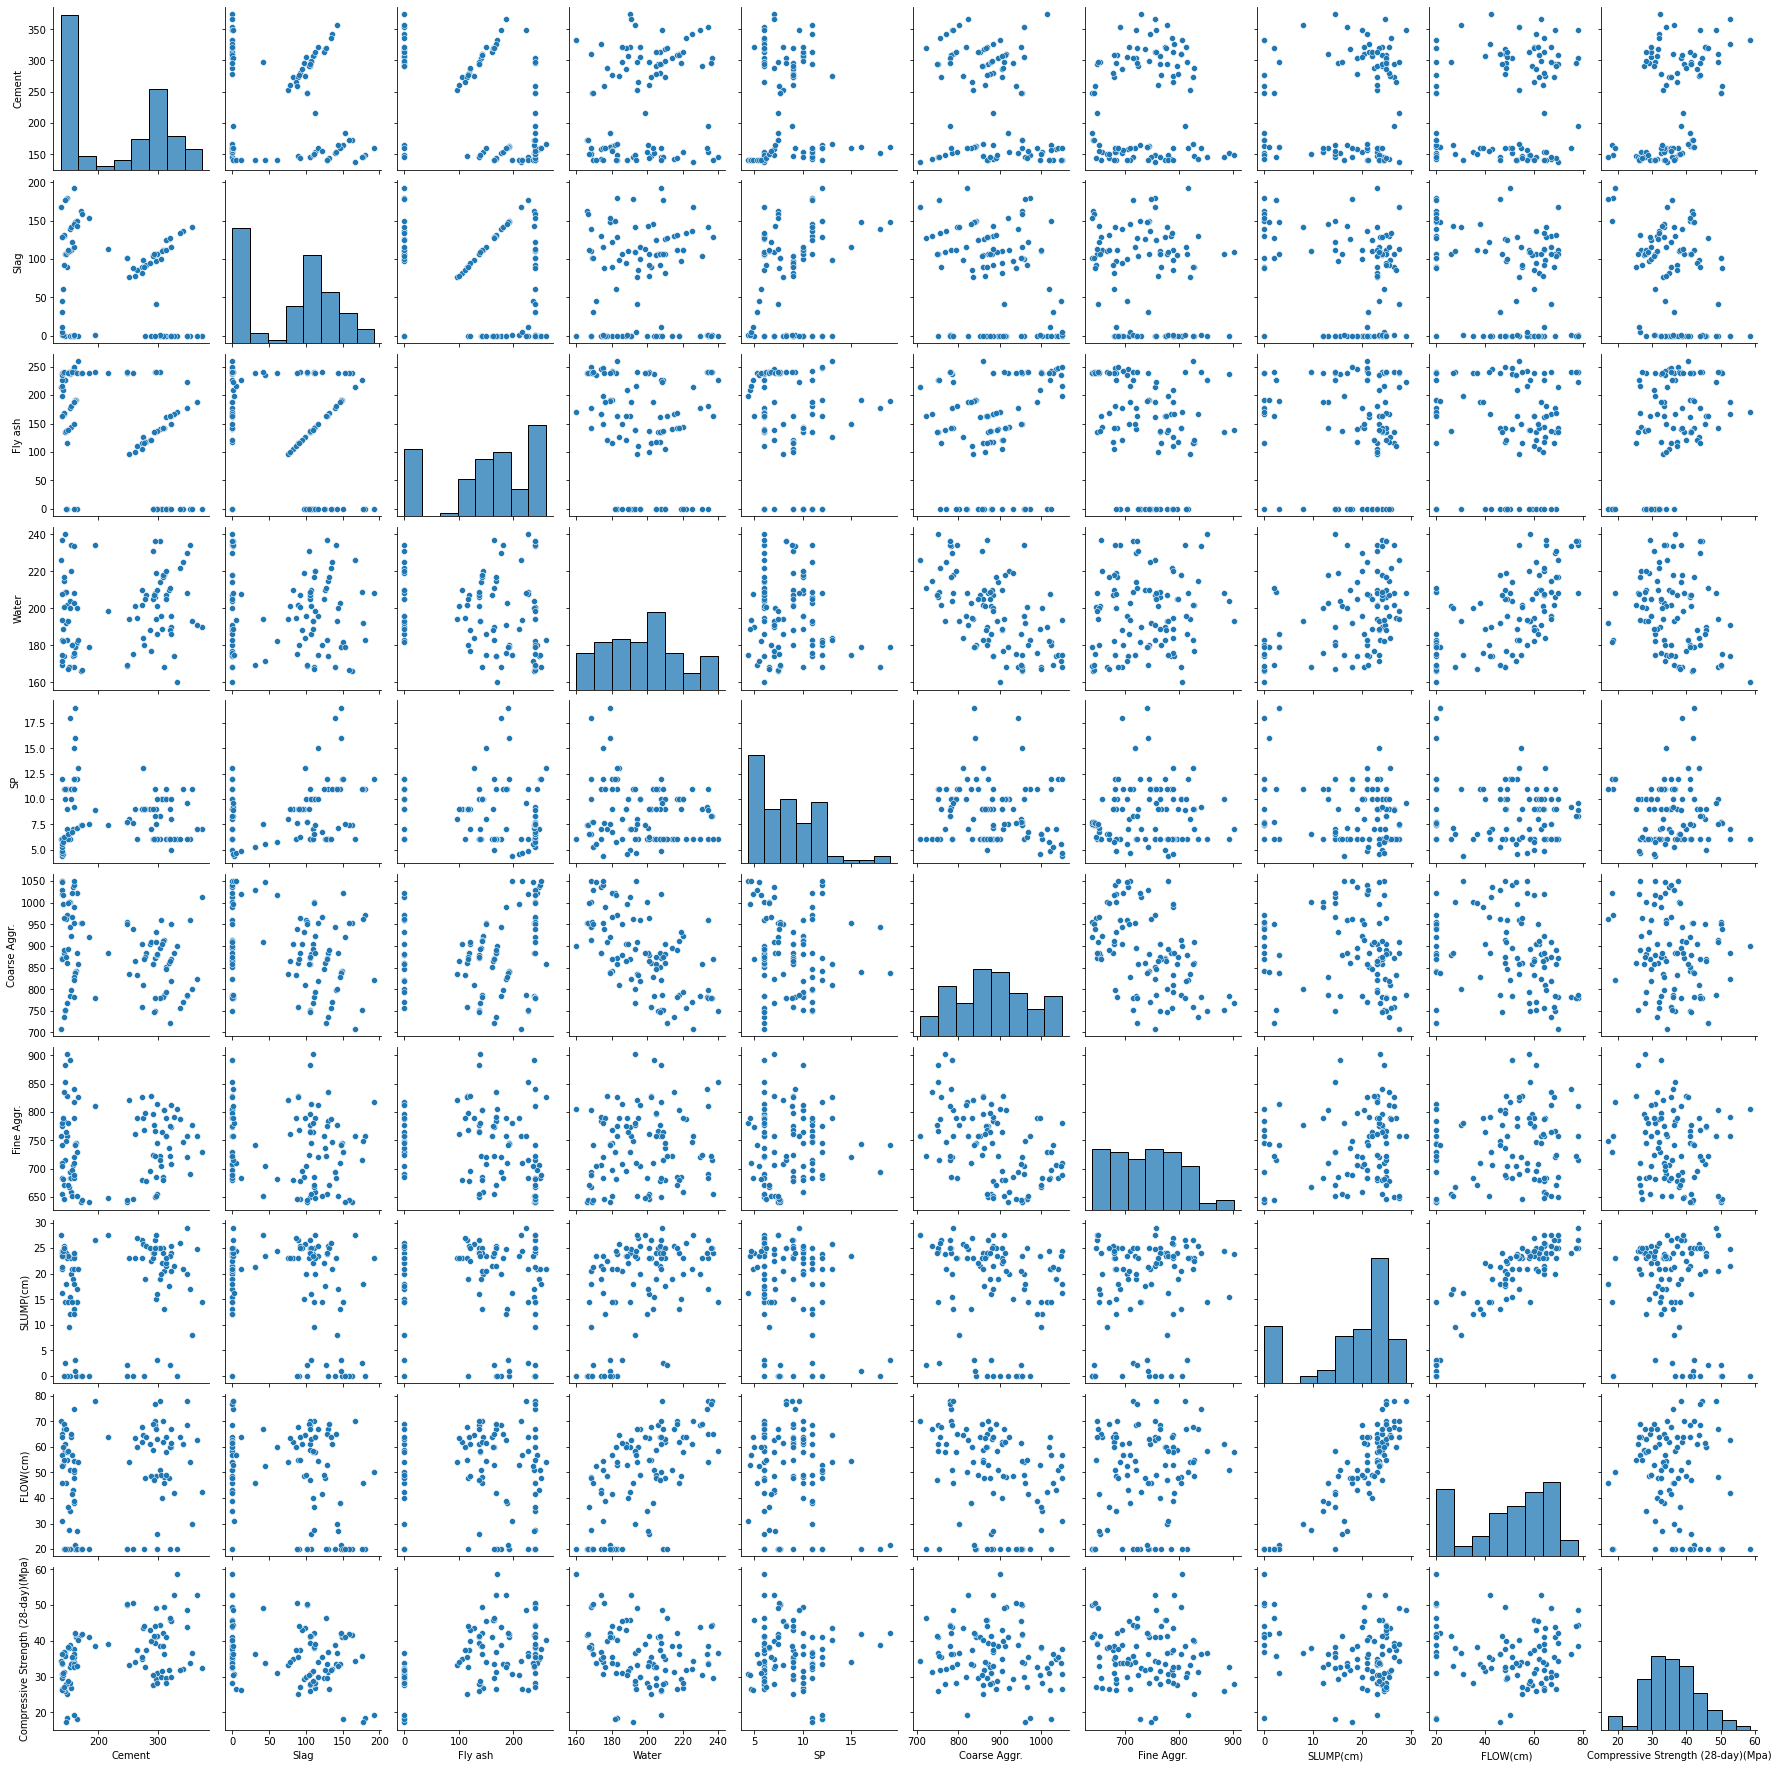

In [7]:
sns.pairplot(df);

In [10]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


In [11]:
df.corr()["Compressive Strength (28-day)(Mpa)"]

Cement                                0.446
Slag                                 -0.332
Fly ash                               0.444
Water                                -0.254
SP                                   -0.038
Coarse Aggr.                         -0.161
Fine Aggr.                           -0.155
SLUMP(cm)                            -0.223
FLOW(cm)                             -0.124
Compressive Strength (28-day)(Mpa)    1.000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [153]:
for i in df.drop(columns ="Compressive Strength (28-day)(Mpa)"):
    print(f"corr between Compressive Strength (28-day)(Mpa)  and {i:<12}:  {df['Compressive Strength (28-day)(Mpa)'].corr(df[i])}") 

corr between Compressive Strength (28-day)(Mpa)  and Cement      :  0.445656142563621
corr between Compressive Strength (28-day)(Mpa)  and Slag        :  -0.33152226429150117
corr between Compressive Strength (28-day)(Mpa)  and Fly ash     :  0.44437968506874465
corr between Compressive Strength (28-day)(Mpa)  and Water       :  -0.2543201492378115
corr between Compressive Strength (28-day)(Mpa)  and SP          :  -0.037909280335955774
corr between Compressive Strength (28-day)(Mpa)  and Coarse Aggr.:  -0.16060986575287395
corr between Compressive Strength (28-day)(Mpa)  and Fine Aggr.  :  -0.15453179659662755
corr between Compressive Strength (28-day)(Mpa)  and SLUMP(cm)   :  -0.2234993688009328
corr between Compressive Strength (28-day)(Mpa)  and FLOW(cm)    :  -0.12418851574647044


<AxesSubplot:>

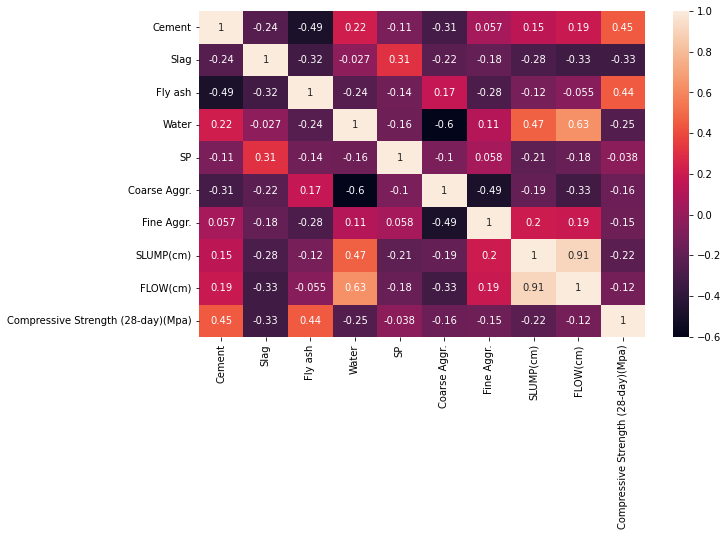

In [109]:
sns.heatmap(df.corr(), annot = True)

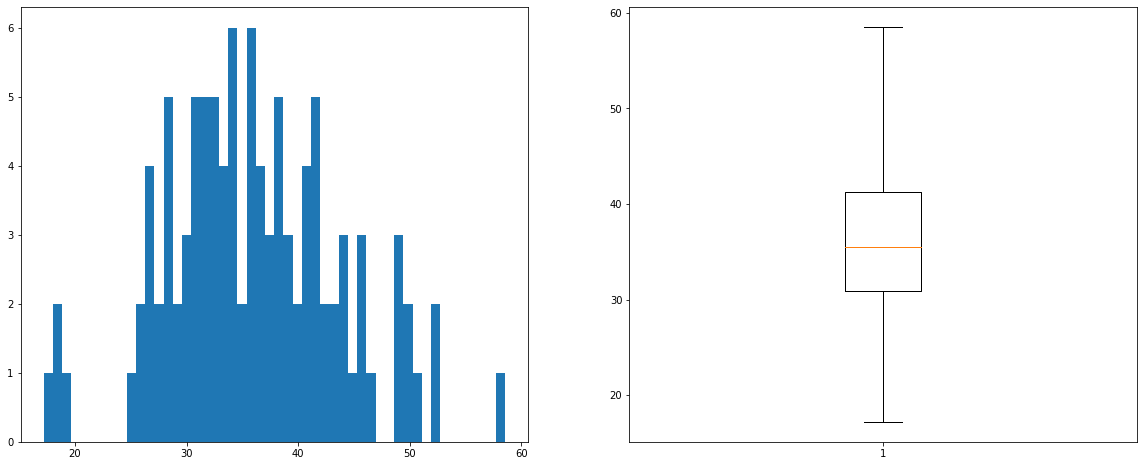

In [147]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
plt.hist(df["Compressive Strength (28-day)(Mpa)"], bins=50)

plt.subplot(122)
plt.boxplot(df["Compressive Strength (28-day)(Mpa)"], whis=2.5)

plt.show()

In [33]:
def plot_relation(df, target_var):
    fig, axs = plt.subplots(3, 3, figsize=(9, 9))
    c = 0
    for i in range(3):
        for j in range(3):
            if df.columns[c] != target_var:
                sns.regplot(x=df.columns[c],
                            y=target_var,
                            data=df,
                            ax=axs[i][j])
            c += 1
    plt.tight_layout()

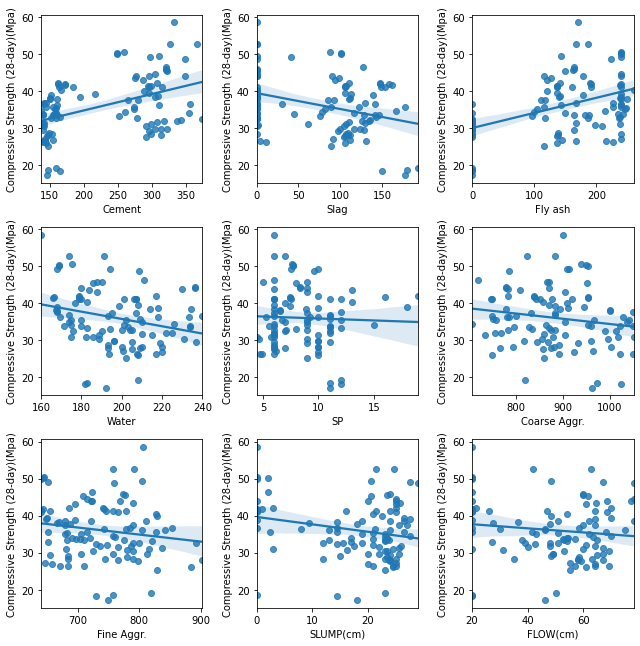

In [34]:
plot_relation(df,"Compressive Strength (28-day)(Mpa)" )

# Data Preprocessing 

### Features and target variable

In [14]:
X = df.drop(columns ="Compressive Strength (28-day)(Mpa)")
y = df["Compressive Strength (28-day)(Mpa)"]

### Splitting data into training and testing

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [18]:
df.sample(5)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
55,159.000,193.000,0.000,208.000,12.000,821.000,818.000,23.000,50.000,19.190
5,147.000,89.000,115.000,202.000,9.000,860.000,829.000,23.000,55.000,25.210
102,348.700,0.100,223.100,208.500,9.600,786.200,758.100,29.000,78.000,48.700
58,143.000,131.000,168.000,217.000,6.000,891.000,672.000,25.000,69.000,26.420
88,150.400,110.900,239.700,168.100,6.500,1000.200,667.200,9.500,27.500,37.920


In [19]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (72, 9)
Train target shape   :  (72,)
Test features shape  :  (31, 9)
Test target shape    :  (31,)


## Scaling

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

In [21]:
scaler.fit(X_train)

StandardScaler()

In [24]:
# X_train_scaled = scaler.transform(X_train) 
# X_train_scaled

In [25]:
# X_test_scaled = scaler.transform(X_test)
# X_test_scaled

In [26]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [27]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


##  1. Model Building (Linear Regression)

In [28]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [29]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [31]:
y_pred

array([44.94299605, 41.16873674, 28.56272909, 39.21080389, 35.28236585,
       39.4569656 , 37.25196776, 31.22714355, 28.76995244, 34.48046156,
       44.52628261, 47.0561972 , 44.7391107 , 32.58856554, 34.15920803,
       27.20438484, 28.58699026, 38.66529788, 30.64018029, 42.44209662,
       49.25648715, 38.48521035, 21.29152264, 49.17364775, 33.7000398 ,
       48.96117972, 31.63820909, 40.5501122 , 36.43202979, 38.77553078,
       32.45505238])

In [32]:
y_train_pred

array([30.52777817, 46.68351444, 18.34658935, 39.85543113, 36.00995385,
       25.56571509, 28.46184421, 36.92007114, 41.37285362, 33.94559588,
       35.30923505, 33.12662117, 33.23810272, 28.4508074 , 33.83339684,
       39.53798731, 27.7250412 , 33.19962279, 31.44979332, 34.98731327,
       46.56491413, 29.04240825, 36.32393935, 40.41545401, 42.70682213,
       36.28311783, 37.66074791, 27.69289425, 38.46171029, 38.57425673,
       34.48842703, 37.05655235, 30.34208725, 43.30974278, 44.20560274,
       45.59476418, 32.3736416 , 36.52133486, 42.90604156, 39.13375205,
       48.48557657, 29.07983506, 30.28676951, 28.01820161, 52.78994903,
       37.66179421, 31.04013701, 28.32594377, 51.61476088, 39.87956122,
       25.11477299, 26.81318739, 43.32830269, 17.57252471, 43.42888718,
       40.45826983, 39.58361431, 42.62413225, 40.70482463, 17.38596773,
       35.7053275 , 43.26452104, 26.75467457, 31.50154548, 33.20003987,
       29.53404299, 36.17505049, 30.36803815, 35.02970499, 45.55

### 1.1 Interpret the model

In [35]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [38]:
comparing = pd.DataFrame(my_dict)

In [39]:
result_sample = comparing.head(10)
result_sample

,Actual,Pred,Residual
30,45.820,44.943,0.877
67,40.340,41.169,-0.829
62,28.290,28.563,-0.273
47,43.010,39.211,3.799
42,33.510,35.282,-1.772
40,35.660,39.457,-3.797
90,35.520,37.252,-1.732
45,31.770,31.227,0.543
10,26.020,28.770,-2.750
0,34.990,34.480,0.510


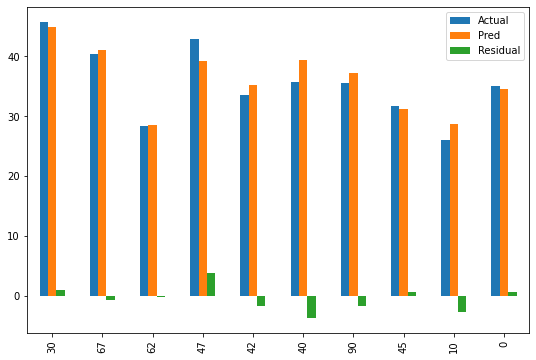

In [42]:
result_sample.plot(kind ="bar", figsize=(9,6))
plt.show()

### 1.2 Model Evaluation

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [44]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.900,0.921
mae,1.992,1.716
mse,6.237,4.439
rmse,2.497,2.107


## <span style='color:red'> Multicolineratiy</span> 

If there is a strong correlation between the independent variables, this situation is called **multicolineraty**.
 
**Multicolineraty** prevents my model from detecting important features.

In [45]:
def color_red(val):
    if val > 0.90 and val < 0.99:
        color = 'blue'
    else:
        color = 'pink'
    return f'color: {color}'

In [46]:
pd.DataFrame(df).corr().style.applymap(color_red)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445656
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331522
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444380
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254320
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037909
Coarse Aggr.,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160610
Fine Aggr.,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154532
SLUMP(cm),0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223499
FLOW(cm),0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124189
Compressive Strength (28-day)(Mpa),0.445656,-0.331522,0.444380,-0.254320,-0.037909,-0.160610,-0.154532,-0.223499,-0.124189,1.000000


## <span style='color:red'> Cross Validation</span> 

We do cross-validation to check whether the one-time scores we receive are consistent or not

cross validation is only applied to the train set.

![image-2.png](attachment:image-2.png)

In [47]:
from sklearn.model_selection import cross_validate

In [48]:
model = LinearRegression()
scores = cross_validate(model,
                        X_train_scaled,
                        y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [49]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.858
test_neg_mean_absolute_error       -2.186
test_neg_mean_squared_error        -7.764
test_neg_root_mean_squared_error   -2.738
dtype: float64

In [50]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.900,0.921
mae,1.992,1.716
mse,6.237,4.439
rmse,2.497,2.107


# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

In [55]:
from sklearn.linear_model import Ridge

In [56]:
ridge_model = Ridge(alpha=1, random_state=42)

In [57]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [58]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [59]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.899,0.922
mae,2.003,1.699
mse,6.313,4.398
rmse,2.513,2.097


In [60]:
pd.concat([ls, rs], axis=1).T

,R2,mae,mse,rmse
linear_train,0.900,1.992,6.237,2.497
linear_test,0.921,1.716,4.439,2.107
ridge_train,0.899,2.003,6.313,2.513
ridge_test,0.922,1.699,4.398,2.097


## Choosing best alpha value with Cross-Validation

In [61]:
from sklearn.linear_model import RidgeCV

In [107]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [108]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [109]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [110]:
ridge_cv_model.alpha_ 

0.42000000000000004

In [111]:
ridge_cv_model.best_score_

-2.7103368987598886

In [112]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [113]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.900,0.923
mae,1.999,1.694
mse,6.267,4.357
rmse,2.503,2.087


In [114]:
pd.concat([ls, rs, rcs], axis = 1).T

,R2,mae,mse,rmse
linear_train,0.900,1.992,6.237,2.497
linear_test,0.921,1.716,4.439,2.107
ridge_train,0.899,2.003,6.313,2.513
ridge_test,0.922,1.699,4.398,2.097
ridge_cv_train,0.900,1.999,6.267,2.503
ridge_cv_test,0.923,1.694,4.357,2.087


## 2.2 Lasso (Apply and evalute)

In [115]:
from sklearn.linear_model import Lasso, LassoCV

In [116]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [117]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [118]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.768,0.816
mae,3.016,2.588
mse,14.521,10.343
rmse,3.811,3.216


In [119]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.900,0.921,0.899,0.922,0.900,0.923,0.768,0.816
mae,1.992,1.716,2.003,1.699,1.999,1.694,3.016,2.588
mse,6.237,4.439,6.313,4.398,6.267,4.357,14.521,10.343
rmse,2.497,2.107,2.513,2.097,2.503,2.087,3.811,3.216


### Choosing best alpha value with Cross-Validation

In [120]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42) 

In [121]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [122]:
lasso_cv_model.alpha_

0.01

In [123]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

(array([99], dtype=int64),)

In [124]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [125]:
lasso_cv_model.mse_path_[99].mean()

7.686622513266667

In [126]:
y_pred = lasso_cv_model.predict(X_test_scaled)  
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [127]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.900,0.923
mae,1.998,1.687
mse,6.259,4.346
rmse,2.502,2.085


In [128]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.900,0.921,0.899,0.922,0.900,0.923,0.768,0.816,0.900,0.923
mae,1.992,1.716,2.003,1.699,1.999,1.694,3.016,2.588,1.998,1.687
mse,6.237,4.439,6.313,4.398,6.267,4.357,14.521,10.343,6.259,4.346
rmse,2.497,2.107,2.513,2.097,2.503,2.087,3.811,3.216,2.502,2.085


## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [129]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [130]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # l1_ratio: 1: Lasso or 0:Ridge
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [131]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [132]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.625,0.625
mae,3.870,3.724
mse,23.448,21.153
rmse,4.842,4.599


In [133]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1).T

,R2,mae,mse,rmse
linear_train,0.900,1.992,6.237,2.497
linear_test,0.921,1.716,4.439,2.107
ridge_train,0.899,2.003,6.313,2.513
ridge_test,0.922,1.699,4.398,2.097
ridge_cv_train,0.900,1.999,6.267,2.503
ridge_cv_test,0.923,1.694,4.357,2.087
lasso_train,0.768,3.016,14.521,3.811
lasso_test,0.816,2.588,10.343,3.216
lasso_cv_train,0.900,1.998,6.259,2.502
lasso_cv_test,0.923,1.687,4.346,2.085


### Choosing best alpha and l1_ratio values with Cross-Validation

In [134]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [135]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [136]:
elastic_cv_model.alpha_

0.01

In [137]:
elastic_cv_model.l1_ratio_

0.1

In [138]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [139]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.899,0.923
mae,2.001,1.693
mse,6.287,4.367
rmse,2.507,2.090


In [140]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1).T

,R2,mae,mse,rmse
linear_train,0.900,1.992,6.237,2.497
linear_test,0.921,1.716,4.439,2.107
ridge_train,0.899,2.003,6.313,2.513
ridge_test,0.922,1.699,4.398,2.097
ridge_cv_train,0.900,1.999,6.267,2.503
ridge_cv_test,0.923,1.694,4.357,2.087
lasso_train,0.768,3.016,14.521,3.811
lasso_test,0.816,2.588,10.343,3.216
lasso_cv_train,0.900,1.998,6.259,2.502
lasso_cv_test,0.923,1.687,4.346,2.085


## 2.4 Gridsearch

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [143]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [144]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [145]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [146]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1}

In [147]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002,0.000,0.001,0.000,0.010,0.100,"{'alpha': 0.01, 'l1_ratio': 0.1}",-2.652,-3.060,-1.837,-3.328,-2.678,-2.711,0.504,1
1,0.001,0.000,0.000,0.000,0.010,0.500,"{'alpha': 0.01, 'l1_ratio': 0.5}",-2.642,-3.073,-1.832,-3.335,-2.680,-2.713,0.510,3
2,0.001,0.000,0.000,0.000,0.010,0.700,"{'alpha': 0.01, 'l1_ratio': 0.7}",-2.640,-3.080,-1.831,-3.342,-2.682,-2.715,0.513,5
3,0.000,0.001,0.000,0.000,0.010,0.900,"{'alpha': 0.01, 'l1_ratio': 0.9}",-2.640,-3.089,-1.831,-3.352,-2.684,-2.719,0.517,7
4,0.000,0.001,0.000,0.000,0.010,0.950,"{'alpha': 0.01, 'l1_ratio': 0.95}",-2.642,-3.091,-1.831,-3.354,-2.684,-2.720,0.517,9
5,0.000,0.000,0.000,0.000,0.010,0.990,"{'alpha': 0.01, 'l1_ratio': 0.99}",-2.644,-3.094,-1.832,-3.357,-2.684,-2.722,0.518,11
6,0.001,0.001,0.000,0.000,0.010,1,"{'alpha': 0.01, 'l1_ratio': 1}",-2.645,-3.094,-1.832,-3.358,-2.685,-2.723,0.518,12
7,0.001,0.000,0.000,0.000,0.012,0.100,"{'alpha': 0.012, 'l1_ratio': 0.1}",-2.658,-3.053,-1.840,-3.330,-2.678,-2.712,0.502,2
8,0.001,0.000,0.000,0.000,0.012,0.500,"{'alpha': 0.012, 'l1_ratio': 0.5}",-2.646,-3.068,-1.834,-3.338,-2.679,-2.713,0.509,4
9,0.001,0.000,0.000,0.000,0.012,0.700,"{'alpha': 0.012, 'l1_ratio': 0.7}",-2.641,-3.076,-1.833,-3.345,-2.681,-2.715,0.512,6


In [148]:
grid_model.best_index_

0

In [149]:
grid_model.best_score_

-2.7110491569224235

## Using Best Hyper Parameters From GridSearch

In [150]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [151]:
gs = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gs

,GridSearch_train,GridSearch_test
R2,0.899,0.923
mae,2.001,1.693
mse,6.287,4.367
rmse,2.507,2.090


In [152]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs, gs], axis = 1).T

,R2,mae,mse,rmse
linear_train,0.900,1.992,6.237,2.497
linear_test,0.921,1.716,4.439,2.107
ridge_train,0.899,2.003,6.313,2.513
ridge_test,0.922,1.699,4.398,2.097
ridge_cv_train,0.900,1.999,6.267,2.503
ridge_cv_test,0.923,1.694,4.357,2.087
lasso_train,0.768,3.016,14.521,3.811
lasso_test,0.816,2.588,10.343,3.216
lasso_cv_train,0.900,1.998,6.259,2.502
lasso_cv_test,0.923,1.687,4.346,2.085
